# Study about Cartola FC Data 
**Machine Learning.**


**Members**:


*   Lourdes Milagros Mendoza Villavicencio
*   Bruno Vicente Alves de Lima

**Activity**

- Classification using decision Trre.

 

**Descrição das Variaveis**


| coluna          | descrição                                                 | observações                                                                                        |
|-----------------|-----------------------------------------------------------|----------------------------------------------------------------------------------------------------|
| Rodada          | número da rodada do Brasileirão                           |                                                                                                    |
| ClubeID         | clube do jogador                                          | ver arquivo times_ids.csv                                                                          |
| AtletaID        | id do jogador                                             |                                                                                                    |
| Participou      | indica se o jogador participou daquela rodada             | FALSE:Não, TRUE:Sim                                                                                |
| Posicao         | posição do jogador                                        | gol:goleiro, zag:zagueiro, lat:lateral, mei:meia, ata:atacante, tec:técnico                        |
| Jogos           | qtde. de jogos que o jogador participou até aquela rodada |                                                                                                    |
| Pontos          | pontuação do jogador                                      |                                                                                                    |
| PontosMedia     | média da pontuação do jogador                             |                                                                                                    |
| Preco           | preço do jogador                                          |                                                                                                    |
| PrecoVariacao   | variação de preço                                         |                                                                                                    |
| FS              | faltas sofridas                                           |                                                                                                    |
| PE              | passes errados                                            |                                                                                                    |
| A               | assistências                                              |                                                                                                    |
| FT              | finalizações na trave                                     |                                                                                                    |
| FD              | finalizações defendidas                                   |                                                                                                    |
| FF              | finalizações para fora                                    |                                                                                                    |
| G               | gols                                                      |                                                                                                    |
| I               | impedimentos                                              |                                                                                                    |
| PP              | pênaltis perdidos                                         |                                                                                                    |
| RB              | roubadas de bola                                          |                                                                                                    |
| FC              | faltas cometidas                                          |                                                                                                    |
| GC              | gols contra                                               |                                                                                                    |
| CA              | cartões amarelo                                           |                                                                                                    |
| CV              | cartões vermelho                                          |                                                                                                    |
| SG              | jogos sem sofrer gols                                     |                                                                                                    |
| DD              | defesas difíceis                                          |                                                                                                    |
| DP              | defesas de pênalti                                        |                                                                                                    |
| GS              | gols sofridos                                             |                                                                                                    |
| ano             | ano dos dados                                             |                                                                                                    |
| Apelido         | nome/apelido do jogador                                   |                                                                                                    |
| Status          | status do jogador                                         | Provável, Dúvida, Suspenso, Nulo, ...                                                              |
| risk_points     | desvio-padrão da pontuação do jogador                     |                                                                                                    |
| mes             | mês que a partida ocorreu                                 |                                                                                                    |
| dia             | dia que a partida ocorreu                                 |                                                                                                    |
| away.score.x    | placar to time visitante                                  |                                                                                                    |
| home.score.x    | placar do time da casa                                    |                                                                                                    |
| home.attack     | estimativa de força de ataque do time do jogador          | estimada a partir de uma regressão de Poisson com base no histórico de confrontos entre os times   |
| home.defend     | estimativa de força de defesa do time do jogador          | estimada a partir de uma regressão de Poisson com base no histórico de confrontos entre os times   |
| pred.home.score | estimativa de gols para o time da casa                    | estimada a partir de 10000 simulações  de confronto entre os times usando distribuições de Poisson |
| pred.away.score | estimativa de gols para o time visitante                  | estimada a partir de 10000 simulações,de confronto entre os times usando distribuições de Poisson  |
| variable        | indica se o jogador é do time da casa ou visitante        | home.team: casa, away.team: visitante                                                              |




In [0]:
import pandas as pd
import numpy as np

dados = pd.read_csv('dados_agregados_limpos.csv')

In [69]:
dados.head()

,A,Apelido,AtletaID,CA,CV,ClubeID,DD,DP,FC,FD,...,away.score.x,dia,home.attack,home.defend,home.score.x,mes,pred.away.score,pred.home.score,risk_points,variable
0,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,...,0.0,19.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,home.team
1,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,2.0,1.0,...,2.0,27.0,0.0,0.0,2.0,4.0,0.0,0.0,1.0,away.team
2,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,2.0,0.0,...,1.0,4.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,home.team
3,0.0,Juan,36540,0.0,0.0,Internacional,0.0,0.0,0.0,1.0,...,1.0,10.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,home.team
4,0.0,Juan,36540,1.0,0.0,Internacional,0.0,0.0,5.0,0.0,...,0.0,18.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,away.team


##Separando os dados do Ano de 2017

In [0]:
dados = dados[dados.ano == 2017]

##Selecionando as colunas

In [0]:
colunas = ['A', 'AtletaID', 'DD', 'DP',
       'FD', 'FF', 'FS', 'FT', 'G', 'GS', 'I', 'Jogos', 'PE', 'PP',
       'Pontos', 'PontosMedia', 'Preco',
       'PrecoVariacao', 'RB', 'SG','Posicao']

dados = dados.loc[:, colunas]

##Calculando a média dos atributos para cada jogador

In [0]:
ID = dados.AtletaID.unique()

todos= []
for id in ID:
    temp = dados[dados.AtletaID == id]
    classe = temp['Posicao'].tolist()
    X = temp.drop(['Posicao'], axis=1)
    x_m = np.mean(X)
    lista = x_m.tolist()
    lista.append(classe[0])
    todos.append(lista)

In [0]:
dados = pd.DataFrame(todos, columns=colunas)


In [74]:
dados.head()

,A,AtletaID,DD,DP,FD,FF,FS,FT,G,GS,...,Jogos,PE,PP,Pontos,PontosMedia,Preco,PrecoVariacao,RB,SG,Posicao
0,0.153846,36540.0,0.0,0.0,0.230769,0.461538,0.538462,0.076923,0.0,0.0,...,7.000000,1.076923,0.0,4.023077,4.760000,6.480769,0.086154,1.461538,0.230769,zag
1,0.181818,36612.0,0.0,0.0,0.000000,0.000000,0.727273,0.000000,0.0,0.0,...,7.818182,1.181818,0.0,2.236364,1.936364,7.266364,-0.157273,0.454545,0.272727,lat
2,0.000000,37604.0,0.0,0.0,0.111111,0.000000,0.611111,0.055556,0.0,0.0,...,11.500000,2.277778,0.0,1.711111,1.528889,4.270556,-0.082222,0.722222,0.277778,zag
3,0.142857,37607.0,0.0,0.0,0.214286,0.857143,0.785714,0.000000,0.0,0.0,...,9.500000,2.857143,0.0,2.300000,1.375000,5.448571,-0.025714,1.357143,0.000000,mei
4,0.000000,37608.0,0.0,0.0,0.200000,0.000000,0.400000,0.000000,0.0,0.0,...,3.000000,2.200000,0.0,1.920000,2.074000,3.504000,-0.052000,1.400000,0.000000,mei


## Convertendo em números o atributo classe (Posicao)

In [0]:
dados['Posicao'] = dados['Posicao'].astype('category')

In [76]:
dados.head()

,A,AtletaID,DD,DP,FD,FF,FS,FT,G,GS,...,Jogos,PE,PP,Pontos,PontosMedia,Preco,PrecoVariacao,RB,SG,Posicao
0,0.153846,36540.0,0.0,0.0,0.230769,0.461538,0.538462,0.076923,0.0,0.0,...,7.000000,1.076923,0.0,4.023077,4.760000,6.480769,0.086154,1.461538,0.230769,zag
1,0.181818,36612.0,0.0,0.0,0.000000,0.000000,0.727273,0.000000,0.0,0.0,...,7.818182,1.181818,0.0,2.236364,1.936364,7.266364,-0.157273,0.454545,0.272727,lat
2,0.000000,37604.0,0.0,0.0,0.111111,0.000000,0.611111,0.055556,0.0,0.0,...,11.500000,2.277778,0.0,1.711111,1.528889,4.270556,-0.082222,0.722222,0.277778,zag
3,0.142857,37607.0,0.0,0.0,0.214286,0.857143,0.785714,0.000000,0.0,0.0,...,9.500000,2.857143,0.0,2.300000,1.375000,5.448571,-0.025714,1.357143,0.000000,mei
4,0.000000,37608.0,0.0,0.0,0.200000,0.000000,0.400000,0.000000,0.0,0.0,...,3.000000,2.200000,0.0,1.920000,2.074000,3.504000,-0.052000,1.400000,0.000000,mei


In [77]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
A                696 non-null float64
AtletaID         696 non-null float64
DD               696 non-null float64
DP               696 non-null float64
FD               696 non-null float64
FF               696 non-null float64
FS               696 non-null float64
FT               696 non-null float64
G                696 non-null float64
GS               696 non-null float64
I                696 non-null float64
Jogos            696 non-null float64
PE               696 non-null float64
PP               696 non-null float64
Pontos           696 non-null float64
PontosMedia      696 non-null float64
Preco            696 non-null float64
PrecoVariacao    696 non-null float64
RB               696 non-null float64
SG               696 non-null float64
Posicao          696 non-null category
dtypes: category(1), float64(20)
memory usage: 109.7 KB


In [0]:
dados['class'] = dados['Posicao'].cat.codes

In [79]:
dados.head()

,A,AtletaID,DD,DP,FD,FF,FS,FT,G,GS,...,PE,PP,Pontos,PontosMedia,Preco,PrecoVariacao,RB,SG,Posicao,class
0,0.153846,36540.0,0.0,0.0,0.230769,0.461538,0.538462,0.076923,0.0,0.0,...,1.076923,0.0,4.023077,4.760000,6.480769,0.086154,1.461538,0.230769,zag,4
1,0.181818,36612.0,0.0,0.0,0.000000,0.000000,0.727273,0.000000,0.0,0.0,...,1.181818,0.0,2.236364,1.936364,7.266364,-0.157273,0.454545,0.272727,lat,2
2,0.000000,37604.0,0.0,0.0,0.111111,0.000000,0.611111,0.055556,0.0,0.0,...,2.277778,0.0,1.711111,1.528889,4.270556,-0.082222,0.722222,0.277778,zag,4
3,0.142857,37607.0,0.0,0.0,0.214286,0.857143,0.785714,0.000000,0.0,0.0,...,2.857143,0.0,2.300000,1.375000,5.448571,-0.025714,1.357143,0.000000,mei,3
4,0.000000,37608.0,0.0,0.0,0.200000,0.000000,0.400000,0.000000,0.0,0.0,...,2.200000,0.0,1.920000,2.074000,3.504000,-0.052000,1.400000,0.000000,mei,3


In [80]:
print(dados['Posicao'].unique())
print(dados['class'].unique())

[zag, lat, mei, ata, gol]
Categories (5, object): [zag, lat, mei, ata, gol]
[4 2 3 0 1]


##Normalizando a Base

In [0]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()

y = dados['class']
X = norm.fit_transform(dados.drop(['class', 'Posicao'], axis=1))

## Criando o Modelo Preditivo e Testando usando Cross Validation

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

c = 1
ac = []
rec = []
pre = []

while c < 10:
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1)
  arvore = DecisionTreeClassifier(random_state=0, max_depth=20)
  arvore.fit(X_train, y_train)
  respostas = arvore.predict(X_test)
  
  a = accuracy_score(y_test, respostas)
  r = recall_score(y_test, respostas, average='weighted')
  p = precision_score(y_test, respostas, average='weighted')
  
  ac.append(a)
  rec.append(r)
  pre.append(p)
  c += 1



##Tabelando as Taxas das Execucões

In [0]:
res = []
res.append(ac)
res.append(rec)
res.append(pre)

res = np.array(res)

resultado = pd.DataFrame(res.transpose(), columns=['Acurácia', 'Recall', 'Precisão'])

In [84]:
resultado

,Acurácia,Recall,Precisão
0,0.542857,0.542857,0.546749
1,0.614286,0.614286,0.639042
2,0.671429,0.671429,0.694416
3,0.614286,0.614286,0.613492
4,0.571429,0.571429,0.584416
5,0.671429,0.671429,0.701255
6,0.700000,0.700000,0.701482
7,0.700000,0.700000,0.731901
8,0.600000,0.600000,0.645333


##Plotando a árvore

In [85]:
#Instalando a Biblioteca
!pip install graphviz

In [86]:
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


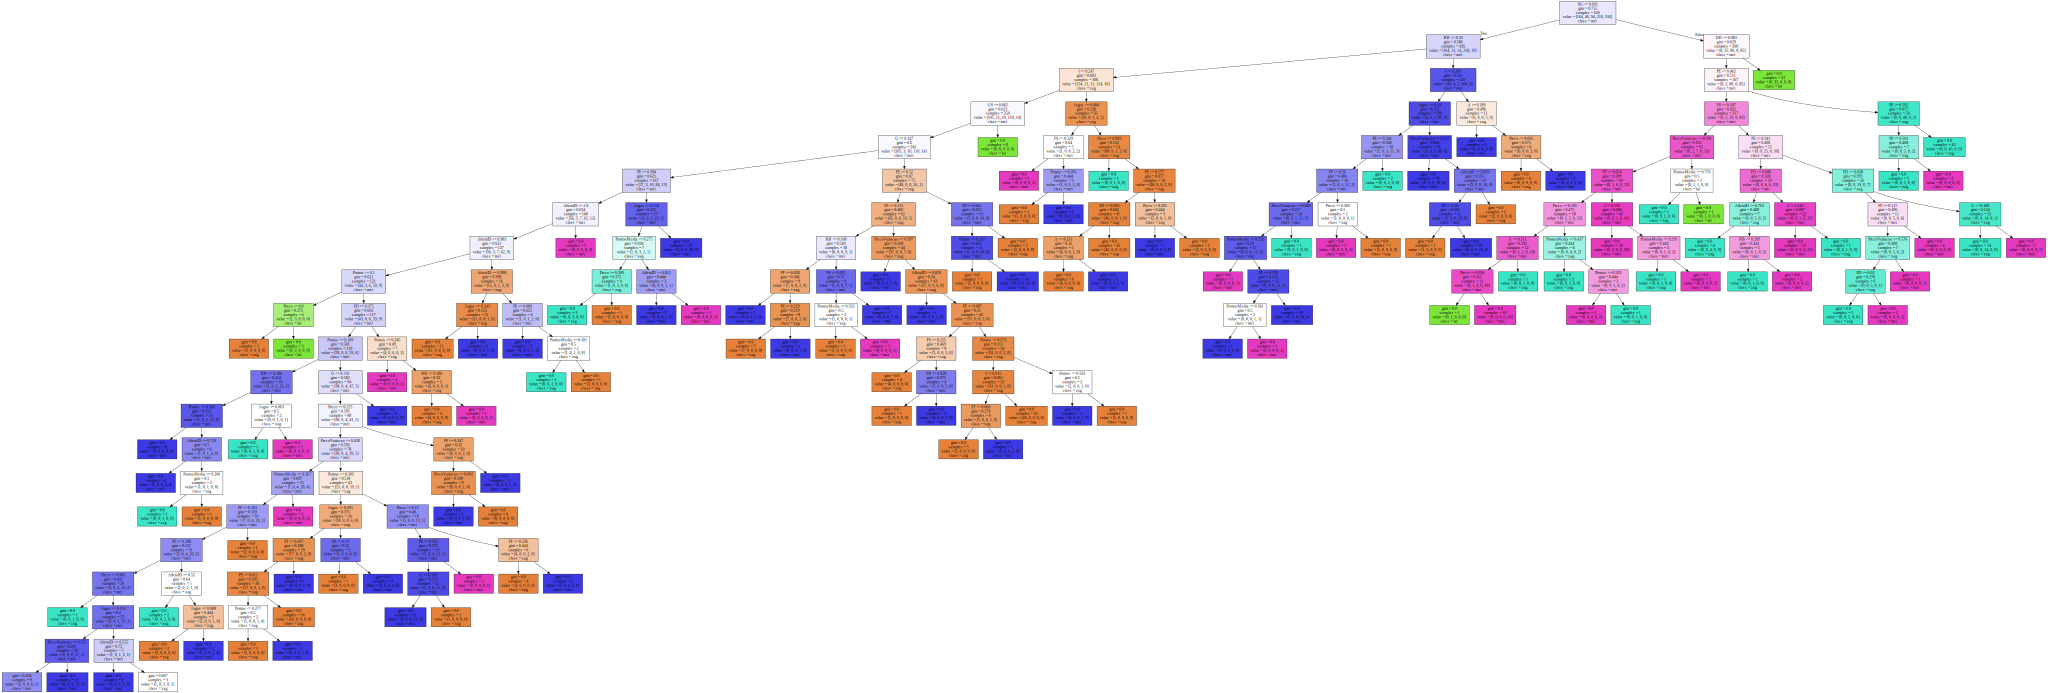

In [87]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

colunas = ['A', 'AtletaID', 'DD', 'DP',
       'FD', 'FF', 'FS', 'FT', 'G', 'GS', 'I', 'Jogos', 'PE', 'PP',
       'Pontos', 'PontosMedia', 'Preco',
       'PrecoVariacao', 'RB', 'SG']

graph = Source(tree.export_graphviz(arvore, out_file=None
   , feature_names=colunas, class_names=dados['Posicao'] 
   , filled = True))

#graph.pipe(format='svg')
display(SVG(graph.pipe(format='svg')))
